# Machine Learning Algorithms

## 4. Support Vector Machines

### Support Vector Classification (SVC)
- Based on the idea of finding a hyperplane that best divides a dataset into two classes
- Support vectors are the data points nearest to the hyperplane (line that linearly separates)
- Distance between the hyperplane and the nearest data point is the margin - goal is to reduce the margin

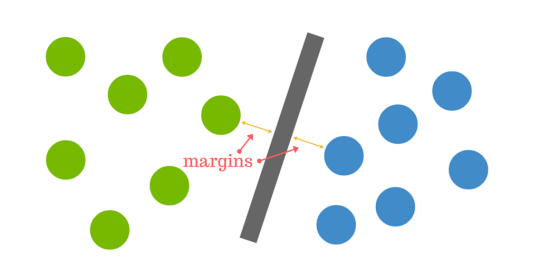

- Non-parametric

- If the data is not linearly separable, a Kernel trick must be employed 

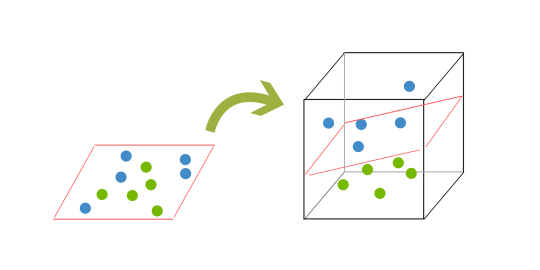

##### Advantages 
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

##### Disadvantages
- Wide datasets can cause overfitting, regularization is crucial.
- No direct  probability estimates, can be calculated using an expensive cross-validation
- Unlike trees, scaling/preprocessing of data required
- Expensive for large datasets

Examine the classification example below:
- The LinearSVC and SVC with linear kernel can only use linear separations
- RBF can separate using 

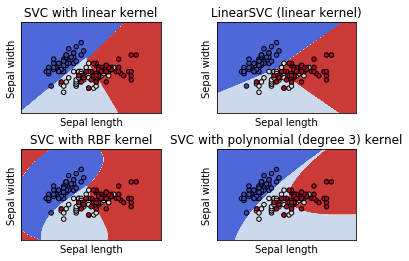

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in"""
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy):
    """Plot the decision boundaries for a classifier.
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    return out

# import some data to play with
iris = datasets.load_iris()
# Take the first two features for example
X = iris.data[:, :2]
y = iris.target

C = 1.0  # SVM regularization parameter

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 meshgrid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

Examine the effect of using different RBF parameters below;
- Gamma is the sensitivity to variance of each training point. Higher the value, the lower the generalization/higher over-fit
- C is the penalty for misclassification. The larger the value, the less generalization ability (as it penalizes every misclassifcation harshly). Acts as regularization 

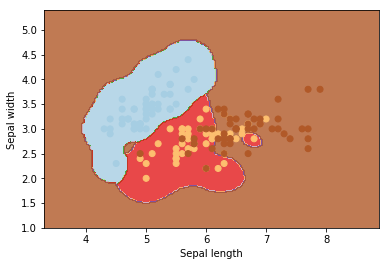

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # Take just 2 classes
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=1,gamma=10).fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # select the range of x and y values for the meshgrid
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))  # specifiy the meshgrid

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.show()

### Support Vector Regression (SVR)
- Just as in the classification case, the kernel functions transform the data into a higher dimensional feature space to perform  linear separation
- SVR uses epsilon-insensitive loss; in the image below, this specifies the band of data points used to satisfy the function we are searching for. Slack variable allows for this to be extended 

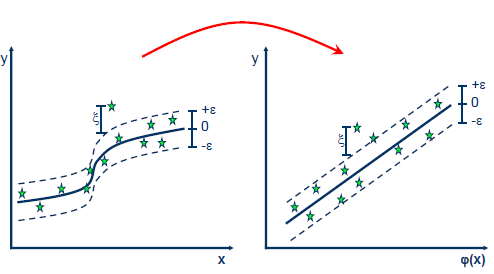

Some characteristics of SVRs are;
- SVMs are less used for regression. They have the extrapolating ability unlike trees
- As you can see SVRs, are very robust to outliers (they don't affect the support vectors)
- However, noisy data can mess up the SVs

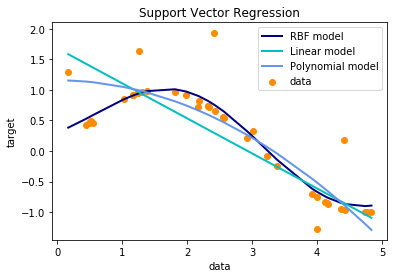

In [1]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

C = 1e2

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=C, gamma=0.1)
svr_lin = SVR(kernel='linear', C=C)
svr_poly = SVR(kernel='poly', C=C, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Kernel Ridge Regression (KRR)
- This is just ridge regression with the kernel trick applied, just like SVR
- But KRR uses squared error loss vs. the epsilon-insenstive loss (as discussed earlier)
- KRR can be calculated in closed form (calculate directly; faster for small datasets, but learned model is non-sparse and prediction slower) whereas SVRs require some constrained optimization algorithm


- Some questions: https://www.analyticsvidhya.com/blog/2017/10/svm-skilltest/ 